# Banana Navigation - Unity Environment

---
The main objective of this code is to train an agent to solve an Unity Environment using Deep Q-Network.

Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from dqn_agent import Agent
from collections import deque
from unityagents import UnityEnvironment

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes. Information about the environment will appear if it starts correctly. 

In [3]:
# Loading the environment
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Interacting with the environment in a training mode

Run the code cell below to start training the agent. The environment will be soved when the agent reachs 15 points as average.
Whether that not happen, the program will finish after 1.800 episodes.

In [4]:
SOLVED = 15.0 # Score Average to solve the problem

def dqn(n_episodes=1800, eps_start=1.0, eps_end=0.02, eps_decay=0.995, train=True):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): select run mode - train or interaction
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]             # get the current state
        score = 0                                           # initialize the score
        while True: 
            action = agent.act(state, eps)                  # select an action
            env_info = env.step(action)[brain_name]         # send the action to the environment
            next_state = env_info.vector_observations[0]    # get the next state
            reward = env_info.rewards[0]                    # get the reward
            done = env_info.local_done[0]                   # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon    
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))            
        if np.mean(scores_window) >= SOLVED and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

# Train the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn()

Episode 100	Average Score: 0.80
Episode 200	Average Score: 4.49
Episode 300	Average Score: 7.28
Episode 400	Average Score: 10.92
Episode 500	Average Score: 11.36
Episode 600	Average Score: 12.96
Episode 700	Average Score: 14.23
Episode 800	Average Score: 14.10
Episode 900	Average Score: 14.05
Episode 1000	Average Score: 14.64
Episode 1100	Average Score: 14.49
Episode 1156	Average Score: 15.07
Environment solved in 1156 episodes!	Average Score: 15.07


### 3. The agent learning performance

Run the cell below to visualize the agent learning performance graphically

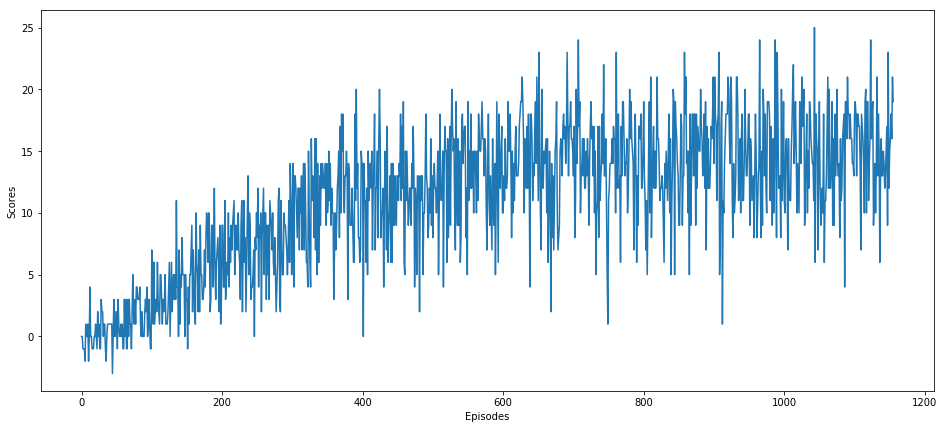

In [5]:
# plot the scores
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Scores')
plt.xlabel('Episodes')
plt.show()

### 4. Load the saved model weights and executing the agent to find out how good it has become!

Loading the saved file checkpoint.pth and watching the agent score average during 100 episodes interaction

In [6]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
scores = dqn(n_episodes=100, eps_start=0.05, eps_end=0.01, eps_decay=0.995, train=False)

Episode 100	Average Score: 15.19


### 5. When finished, close the environment.

In [7]:
env.close()